# Task 1 : Image Stabilization Using Harris

1) Viewing

In [134]:
#Setup Python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline


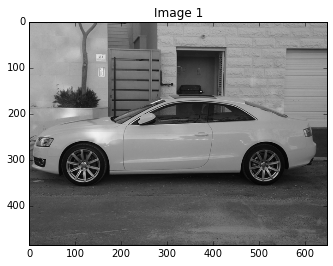

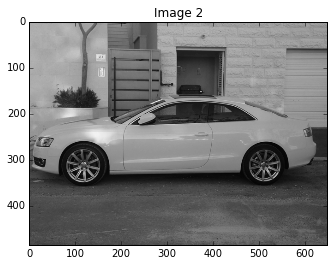

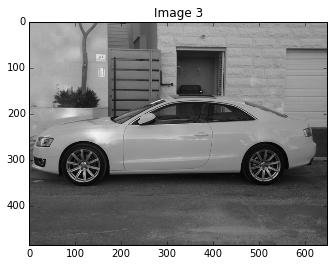

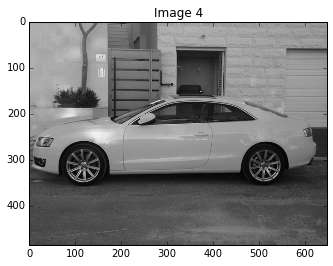

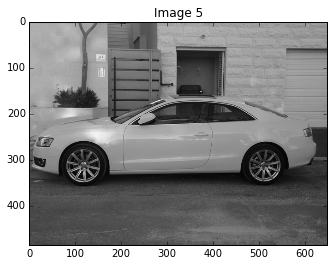

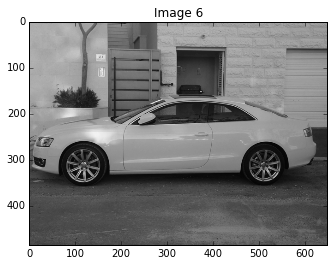

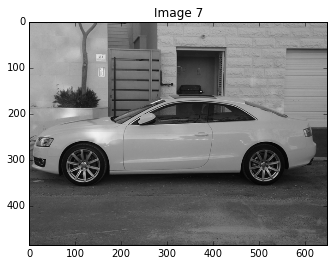

In [135]:
#Load image
imgs = []

for i in range(7):
    imgs.append(mpimg.imread('car'+str(i+1)+'.bmp'))
    plt.figure(i)
    plt.title("Image " + str(i+1))
    plt.imshow(imgs[0],cmap="gray")


2) Detection

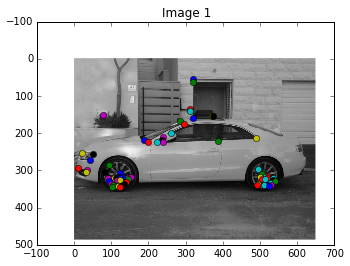

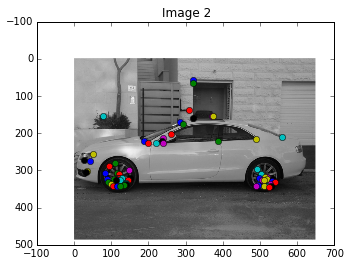

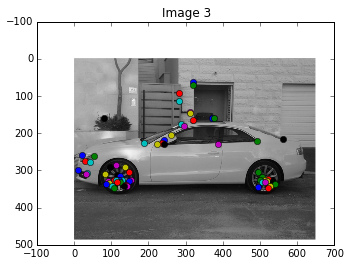

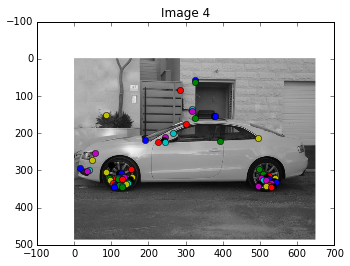

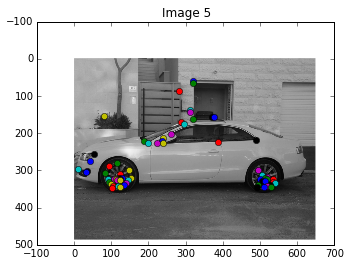

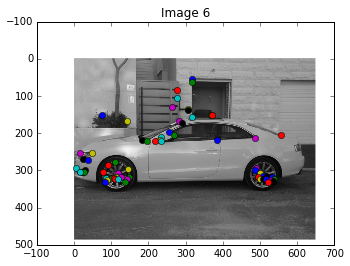

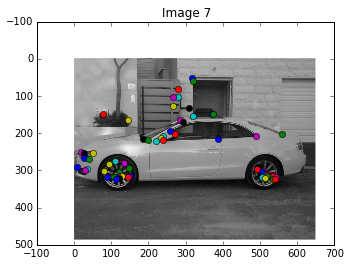

In [136]:
from skimage.feature import corner_harris, corner_peaks

#Find Harris Edges of all images

corners = []

for img in imgs:
    corners.append(corner_peaks(corner_harris(img), min_distance=2))

fig = plt.figure()

for j in range(len(corners)):
    plt.figure(j+1)
    plt.title("Image "+ str(j+1))
    plt.imshow(imgs[j],cmap="gray")
    for i in range(len(corners[0])):
        plt.plot(corners[j][i][1],corners[j][i][0],'o') 

3) Matching

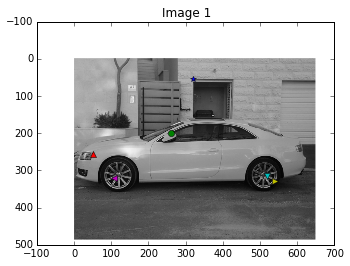

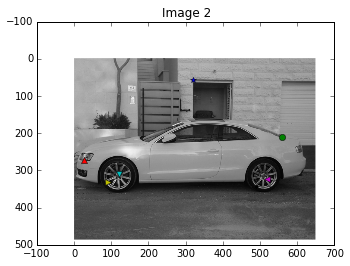

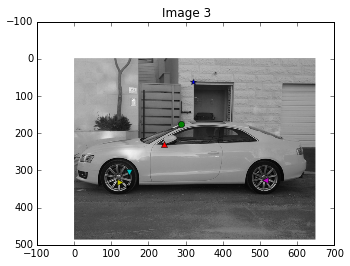

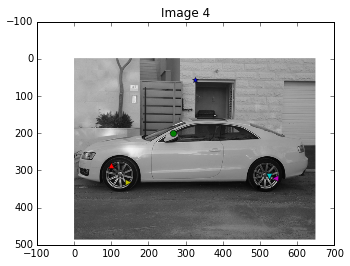

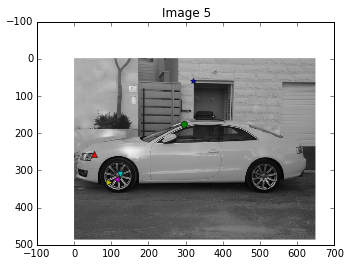

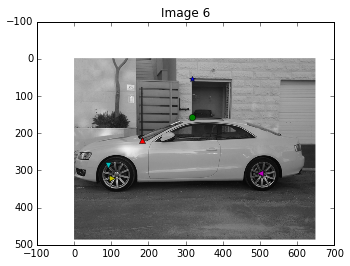

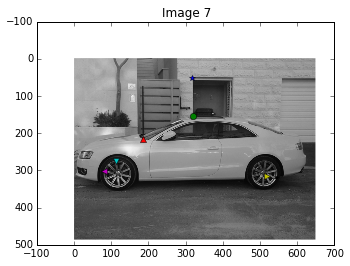

In [140]:
#Choose 6 of the same points
#Create Master List
matches = []

for n in range(len(corners)):
    pt_match = []
    pt_match.append(corners[n][0])
    pt_match.append(corners[n][10])
    pt_match.append(corners[n][20])
    pt_match.append(corners[n][30])
    pt_match.append(corners[n][40])
    pt_match.append(corners[n][50])
    pt_match.append(corners[n][60])
    matches.append(pt_match)

def getDiff(pt1,pt2):
    diff = ((pt1[0]-pt2[0])*(pt1[0]-pt2[0]))+((pt1[1]-pt2[1])*(pt1[1]-pt2[1]))
    return diff



# for i in range(len(corners[0])):
#     curr_pt = corners[0][i]
#     if ( (curr_pt in corners[1][i]) and (curr_pt in corners[2][i]) and (curr_pt in corners[3][i]) and (curr_pt in corners[4][i]) and (curr_pt in corners[5][i]) and (curr_pt in corners[6][i])):
#         print curr_pt
        

# for m in range(len(corners[0])):
#     print corners[0][m], "  ", corners[1][m],corners[2][m], "  ", corners[3][m], corners[4][m], "  ", corners[5][m],  "  ", corners[6][m], 
#     print " "




#Show matches

fig = plt.figure()
plotpoint = ['*','o','^','v','<','>','.']
for j in range(len(matches)):
    plt.figure(j+1)
    plt.title("Image "+ str(j+1))
    plt.imshow(imgs[j],cmap="gray")
    for i in range(len(matches[0])):
        plt.plot(matches[j][i][1],matches[j][i][0],plotpoint[i]) 

4) Transformation

In [145]:
#Following is the equation for each image
#X = (a11*xr)+(a12*yr)+b1
#Y = (a21*xr)+(a22*yr)+b2

#Create list of all values for each of the seven images
a1 = []
a2 = []
b1 = []
b2 = []
for i in range(6):
    a11 = (matches[i][0]- matches[i+1][0])/(matches[i][1]- matches[i+1][1])
    b11 = matches[i][0]=((a11*matches[i][1]))
    a1.append(a11)
    b1.append(b11)
    


5)Stabilization

In [146]:
#X = An[xs]+bn
#Y = An[ys]+bn



x_new = []
y_new = []

for z in range(6):
    x_new.append(matches[i][1]-matches[i][1])
    y_new.append(matches[i][0]-matches[i][0])
    

6)Automatic Matching

In [149]:
#Define an LxL window
l_width = 5
h, w = imgs[0].shape

matches = []

#Go through entire image
for i in range(h-l_width):
    for j in range(wl_width):
        
        #Check within LxL window
        for m in range(l_width):
            for n in range(w_width):
                basevalue = [i+m,j+n]
                #If difference is lowest here this is new match
                if(getDiff(basevalue,corners[0])<10):
                    matches.append(basevalue)
                
                    


486

7)RANSAC

In [150]:
import random as random

def RANSAC(matches):
    #Choose a random point 
    pt1 = random.randint(0,len(matches))
    pt2 = random.randint(0,len(matches))
    pt3 = random.randint(0,len(matches))

    #Calculate the transformation 
    a1 = []
    a2 = []
    b1 = []
    b2 = []
    for i in range(6):
        a11 = (pt1[i][0]- pt2[i+1][0])/(pt1[i][1]- pt2[i+1][1])
        b11 = pt1[i][0]=((a11*pt1[i][1]))
        a1.append(a11)
        b1.append(b11)

    #Stabilize
    x_new = []
    y_new = []

    for z in range(6):
        x_new.append(pt1[i][1]-pt2[i][1])
        y_new.append(pt1[i][0]-pt2[i][0])
        
    return x_new, y_new

#Repeat several times
for w in range(50):
    RANSAC(matches)
        

8)Stabilization II

In [ ]:
for w2 in range(50):
    RANSAC(matches)
    
    #Additional Stabilization
    for z in range(6):
        x_new.append(pt1[i][1]-pt2[i][1])
        y_new.append(pt1[i][0]-pt2[i][0])